<a href="https://colab.research.google.com/github/sanakabharath/MLT/blob/main/task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=c9d91165d90232c92502f5612824e9430c9b8646a2414a8832c6a4f10303e9f4
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering
--- K-Means ---
Silhouette Score: 0.4799 (higher is better, max=1)
Calinski-Harabasz Index: 157.3602 (higher is better)
Davies-Bouldin Index: 0.7894 (lower is better)

--- K-Medoids (PAM) ---
Silhouette Score: 0.4526 (higher is better, max=1)
Calinski-Harabasz Index: 239.8691 (higher is better)
Davies-Bouldin Index: 0.8353 (lower is better)



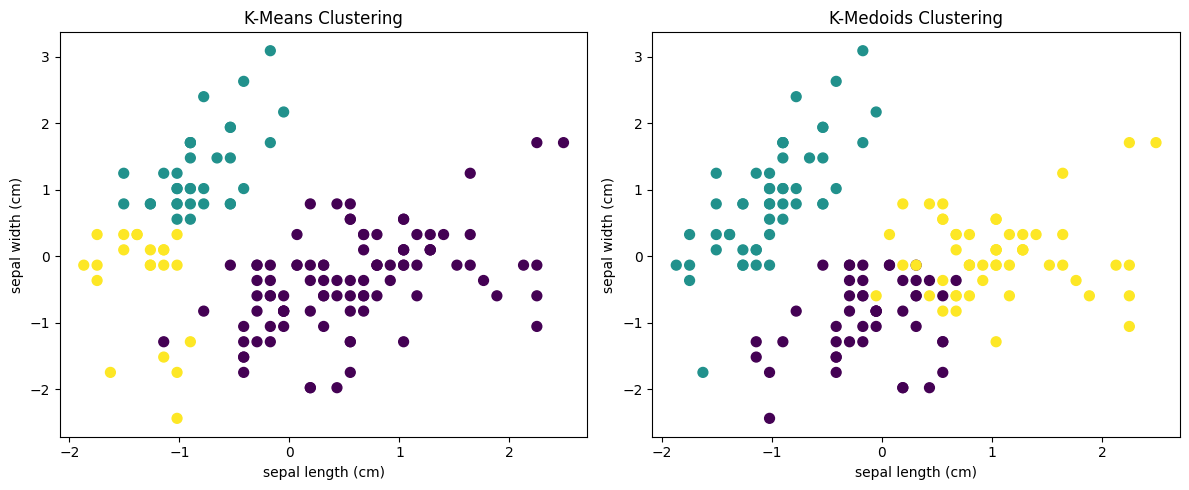

In [ ]:
# Install pyclustering for K-Medoids (if not installed)
!pip install pyclustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load Iris dataset
data = load_iris()
X = data.data

# Normalize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters (iris dataset has 3 classes)
k = 3

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. K-Medoids Clustering using pyclustering
# Need initial medoids indices; choose k random samples
np.random.seed(42)
initial_medoids = np.random.choice(len(X_scaled), k, replace=False)

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(X_scaled)

# Create K-Medoids instance
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_clusters = kmedoids_instance.get_clusters()

# Convert clusters to label array
kmedoids_labels = np.zeros(len(X_scaled))
for cluster_id, cluster in enumerate(kmedoids_clusters):
    for idx in cluster:
        kmedoids_labels[idx] = cluster_id

# Evaluation Metrics function
def evaluate_clustering(X, labels, method_name):
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    print(f"--- {method_name} ---")
    print(f"Silhouette Score: {sil_score:.4f} (higher is better, max=1)")
    print(f"Calinski-Harabasz Index: {ch_score:.4f} (higher is better)")
    print(f"Davies-Bouldin Index: {db_score:.4f} (lower is better)\n")

# Print evaluation results
evaluate_clustering(X_scaled, kmeans_labels, "K-Means")
evaluate_clustering(X_scaled, kmedoids_labels, "K-Medoids (PAM)")

# Optional: plot clustering results on first two features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("K-Means Clustering")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.subplot(1, 2, 2)
plt.title("K-Medoids Clustering")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis', s=50)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()